In [1444]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
import seaborn as sns
from subprocess import check_output
from IPython.display import display, HTML

datasetFolder = "datasets/nba-players-stats-since-1950"
print(check_output(["ls", datasetFolder]).decode("utf8"))

Players.csv
Seasons_Stats.csv



In [1445]:
players=pd.read_csv(datasetFolder + '/Players.csv')
seasons=pd.read_csv(datasetFolder + '/Seasons_Stats.csv')

In [1446]:
players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [1447]:
seasons.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [1448]:
players.shape #shape of the players dataframe

(3922, 8)

In [1449]:
seasons.shape #shape of the seasons dataframe

(24691, 53)

In [1450]:
players.keys()

Index(['Unnamed: 0', 'Player', 'height', 'weight', 'collage', 'born',
       'birth_city', 'birth_state'],
      dtype='object')

In [1451]:
seasons.keys()

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [1452]:
players.isnull().sum()    #checking data quality

Unnamed: 0       0
Player           1
height           1
weight           1
collage        349
born             1
birth_city     470
birth_state    483
dtype: int64

In [1453]:
players.drop('Unnamed: 0' ,axis=1,inplace=True)
players.dropna(how='all',inplace=True) #dropping the player whose value is null
# players.set_index('Player',inplace=True) #setting the player name as the dataframe index
# players = players.sort_values(['born'], ascending=[False])

In [1454]:
players.head(10)

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
5,Gene Berce,180.0,79.0,Marquette University,1926.0,NaN,NaN
6,Charlie Black,196.0,90.0,University of Kansas,1921.0,Arco,Idaho
7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania
8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927.0,New Brunswick,New Jersey
9,Vince Boryla,196.0,95.0,University of Denver,1927.0,East Chicago,Indiana


In [1455]:
players.shape

(3921, 7)

Distribution Of Heights

[]

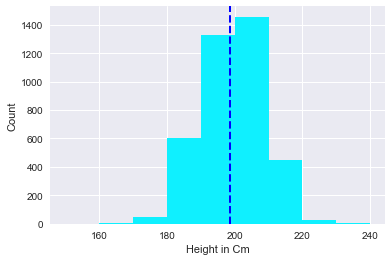

In [1456]:
bins=range(150,250,10)
plt.hist(players["height"],bins,histtype="bar",rwidth=1.2,color='#0ff0ff')
plt.xlabel('Height in Cm')
plt.ylabel('Count')
plt.axvline(players["height"].mean(), color='b', linestyle='dashed', linewidth=2)
plt.plot()

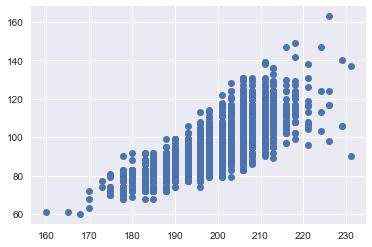

In [1457]:
plt.plot(players.height,players.weight,'o')
plt.show()

In [1458]:
seasons.isnull().sum()

Unnamed: 0        0
Year             67
Player           67
Pos              67
Age              75
Tm               67
G                67
GS             6458
MP              553
PER             590
TS%             153
3PAr           5852
FTr             166
ORB%           3899
DRB%           3899
TRB%           3120
AST%           2136
STL%           3899
BLK%           3899
TOV%           5109
USG%           5051
blanl         24691
OWS             106
DWS             106
WS              106
WS/48           590
blank2        24691
OBPM           3894
DBPM           3894
BPM            3894
VORP           3894
FG               67
FGA              67
FG%             166
3P             5764
3PA            5764
3P%            9275
2P               67
2PA              67
2P%             195
eFG%            166
FT               67
FTA              67
FT%             925
ORB            3894
DRB            3894
TRB             379
AST              67
STL            3894
BLK            3894


In [1459]:
seasonColumns = ['Year','Player','Pos','Age','Tm','G','2P','3P','FG','FT','PTS','DRB','ORB','TRB','AST','STL','BLK','TOV']
seasons.drop('Unnamed: 0', axis=1,inplace=True)
seasons.dropna(how='all',inplace=True) #dropping the players whose value is null
seasons2010plus = seasons[seasons.Year >= 2010]
seasons2010plus = pd.DataFrame(seasons2010plus,columns=seasonColumns)

In [1460]:
seasons2010plus.head(10)

,Year,Player,Pos,Age,Tm,G,2P,3P,FG,FT,PTS,DRB,ORB,TRB,AST,STL,BLK,TOV
19922,2010.0,Arron Afflalo,SG,24.0,DEN,82.0,164.0,108.0,272.0,72.0,724.0,193.0,59.0,252.0,138.0,46.0,30.0,74.0
19923,2010.0,Alexis Ajinca,C,21.0,CHA,6.0,5.0,0.0,5.0,0.0,10.0,3.0,1.0,4.0,0.0,1.0,1.0,2.0
19924,2010.0,LaMarcus Aldridge,PF,24.0,POR,78.0,574.0,5.0,579.0,230.0,1393.0,435.0,192.0,627.0,160.0,67.0,48.0,104.0
19925,2010.0,Joe Alexander,SF,23.0,CHI,8.0,1.0,0.0,1.0,2.0,4.0,3.0,2.0,5.0,2.0,1.0,1.0,0.0
19926,2010.0,Malik Allen,PF,31.0,DEN,51.0,45.0,1.0,46.0,12.0,105.0,46.0,36.0,82.0,16.0,11.0,5.0,22.0
19927,2010.0,Ray Allen,SG,34.0,BOS,80.0,319.0,145.0,464.0,231.0,1304.0,208.0,45.0,253.0,210.0,64.0,25.0,129.0
19928,2010.0,Tony Allen,SG,28.0,BOS,54.0,129.0,0.0,129.0,72.0,330.0,93.0,52.0,145.0,72.0,59.0,19.0,66.0
19929,2010.0,Rafer Alston,PG,33.0,TOT,52.0,97.0,58.0,155.0,59.0,427.0,116.0,13.0,129.0,176.0,50.0,10.0,95.0
19930,2010.0,Rafer Alston,PG,33.0,NJN,27.0,67.0,28.0,95.0,44.0,262.0,66.0,9.0,75.0,104.0,27.0,5.0,61.0
19931,2010.0,Rafer Alston,PG,33.0,MIA,25.0,30.0,30.0,60.0,15.0,165.0,50.0,4.0,54.0,72.0,23.0,5.0,34.0


In [1461]:
seasons2010plus.shape

(4762, 18)

In [1462]:
seasons2010plusC = seasons2010plus[seasons2010plus.Pos == 'C']

In [1463]:
seasons2010plusC.head(10)

,Year,Player,Pos,Age,Tm,G,2P,3P,FG,FT,PTS,DRB,ORB,TRB,AST,STL,BLK,TOV
19923,2010.0,Alexis Ajinca,C,21.0,CHA,6.0,5.0,0.0,5.0,0.0,10.0,3.0,1.0,4.0,0.0,1.0,1.0,2.0
19934,2010.0,David Andersen,C,29.0,HOU,63.0,120.0,27.0,147.0,46.0,367.0,154.0,54.0,208.0,44.0,15.0,12.0,37.0
19938,2010.0,Joel Anthony,C,27.0,MIA,80.0,76.0,0.0,76.0,66.0,218.0,126.0,123.0,249.0,12.0,20.0,109.0,45.0
19943,2010.0,Hilton Armstrong,C,25.0,SAC,6.0,4.0,0.0,4.0,2.0,10.0,9.0,5.0,14.0,2.0,2.0,4.0,4.0
19944,2010.0,Hilton Armstrong,C,25.0,HOU,9.0,5.0,0.0,5.0,0.0,10.0,1.0,5.0,6.0,3.0,5.0,0.0,5.0
19949,2010.0,Jeff Ayres,C,22.0,POR,39.0,43.0,0.0,43.0,18.0,104.0,73.0,25.0,98.0,1.0,7.0,16.0,12.0
19957,2010.0,Earl Barron,C,28.0,NYK,7.0,30.0,0.0,30.0,22.0,82.0,46.0,31.0,77.0,8.0,4.0,4.0,11.0
19959,2010.0,Tony Battie,C,33.0,NJN,15.0,13.0,1.0,14.0,7.0,36.0,19.0,4.0,23.0,3.0,4.0,2.0,3.0
19972,2010.0,Andris Biedrins,C,23.0,GSW,33.0,81.0,0.0,81.0,4.0,166.0,196.0,63.0,259.0,57.0,20.0,44.0,32.0
19980,2010.0,Andrew Bogut,C,25.0,MIL,69.0,473.0,0.0,473.0,149.0,1095.0,493.0,208.0,701.0,127.0,39.0,175.0,131.0


In [1464]:
seasons2010plusC.shape

(902, 18)

In [1465]:
lm = LinearRegression()
# construct X by dropping target field
trainSet = seasons2010plusC.drop(['FT','Year','Player','Pos','Age','Tm','G','PTS'], axis=1)
# trainSet = seasons2010plusC[['FG','FT']]
trainSet.head(10)

,2P,3P,FG,DRB,ORB,TRB,AST,STL,BLK,TOV
19923,5.0,0.0,5.0,3.0,1.0,4.0,0.0,1.0,1.0,2.0
19934,120.0,27.0,147.0,154.0,54.0,208.0,44.0,15.0,12.0,37.0
19938,76.0,0.0,76.0,126.0,123.0,249.0,12.0,20.0,109.0,45.0
19943,4.0,0.0,4.0,9.0,5.0,14.0,2.0,2.0,4.0,4.0
19944,5.0,0.0,5.0,1.0,5.0,6.0,3.0,5.0,0.0,5.0
19949,43.0,0.0,43.0,73.0,25.0,98.0,1.0,7.0,16.0,12.0
19957,30.0,0.0,30.0,46.0,31.0,77.0,8.0,4.0,4.0,11.0
19959,13.0,1.0,14.0,19.0,4.0,23.0,3.0,4.0,2.0,3.0
19972,81.0,0.0,81.0,196.0,63.0,259.0,57.0,20.0,44.0,32.0
19980,473.0,0.0,473.0,493.0,208.0,701.0,127.0,39.0,175.0,131.0


In [1466]:
# Fit the model
lm.fit(trainSet, seasons2010plusC['FT'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1467]:
# print the result of model fitting
print('Estimated intercept coefficient: ', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))

Estimated intercept coefficient:  -8.16667517892
Number of coefficients: 10


In [1468]:
# show the estimated coefficients of model fitting
pd.DataFrame(list(zip(trainSet.columns,lm.coef_)),columns=['features','estimatedCoefficients'])

,features,estimatedCoefficients
0,2P,0.089667
1,3P,0.073360
2,FG,0.163028
3,DRB,0.030097
4,ORB,-0.079521
5,TRB,-0.049424
6,AST,-0.120720
7,STL,0.162709
8,BLK,0.042401
9,TOV,1.029723


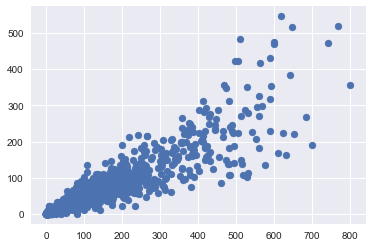

In [1469]:
# plt.plot(seasons2010plusC['FG'],seasons2010plusC['FT'],'o')
plt.scatter(seasons2010plusC['FG'],seasons2010plusC['FT'])
plt.show()

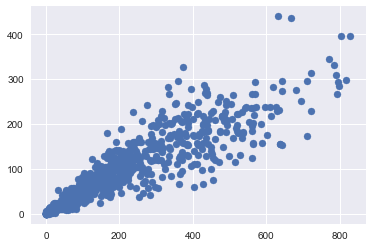

In [1470]:
plt.scatter(seasons2010plusC['DRB'],seasons2010plusC['ORB'])
plt.show()

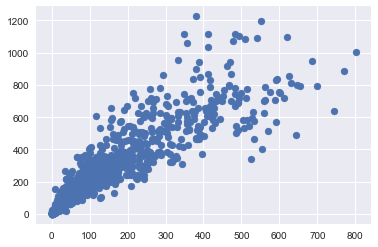

In [1471]:
plt.scatter(seasons2010plusC['FG'],seasons2010plusC['TRB'])
plt.show()